In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
print(mnist.data.shape);

(70000, 784)


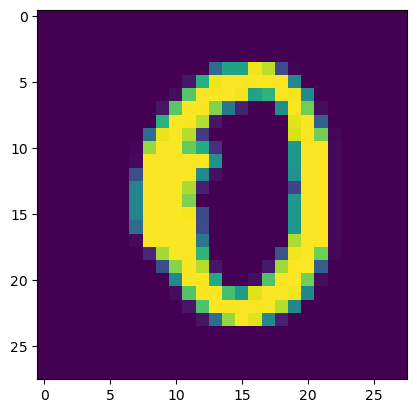

In [3]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)
# train_img[0]
import matplotlib.pyplot as plt
import numpy as np
image=test_img.iloc[0]
image=np.reshape(image.values,(28,28))
plt.imshow(image)

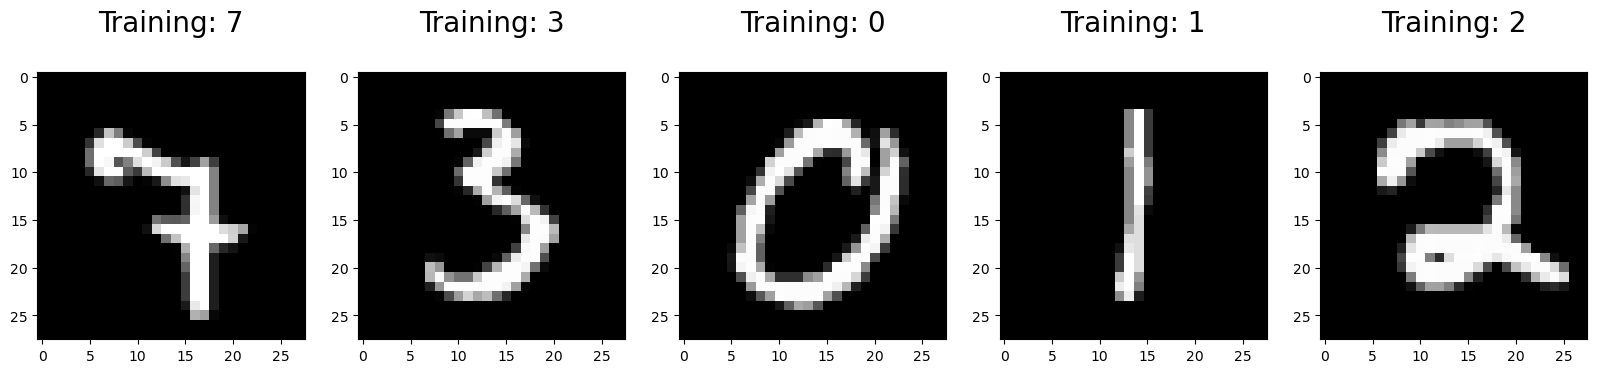

In [4]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(train_img.iloc[index].values, (28,28)),cmap=plt.cm.gray)
    plt.title('Training: %i\n' % int(label), fontsize = 20)

In [5]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(train_img, train_lbl)
predictions = logisticRegr.predict(test_img)
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9184


/Users/darshgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
print("Predicted number for the first ten image from the training set: ")
logisticRegr.predict(test_img.iloc[0:10])

Predicted number for the first ten image from the training set: 


array(['0', '4', '1', '2', '4', '7', '7', '1', '1', '7'], dtype=object)

In [7]:
predictions

array(['0', '4', '1', ..., '1', '3', '0'], dtype=object)

In [8]:
index = 0
misclassifiedIndexes = []

for label, predict in zip(test_lbl, predictions):
  if int(label) != int(predict): 
    # print(label +" "+ predict)
    misclassifiedIndexes.append(index)
  index +=1

print("Total wrong predictions: "+str(len(misclassifiedIndexes)))
test_img.shape
print("Size of the testing dataset: 10000") 
print("Manually calculated score: " + str((10000-len(misclassifiedIndexes))/10000))
print("Function calculated score: "+ str(score))

Total wrong predictions: 816
Size of the testing dataset: 10000
Manually calculated score: 0.9184
Function calculated score: 0.9184


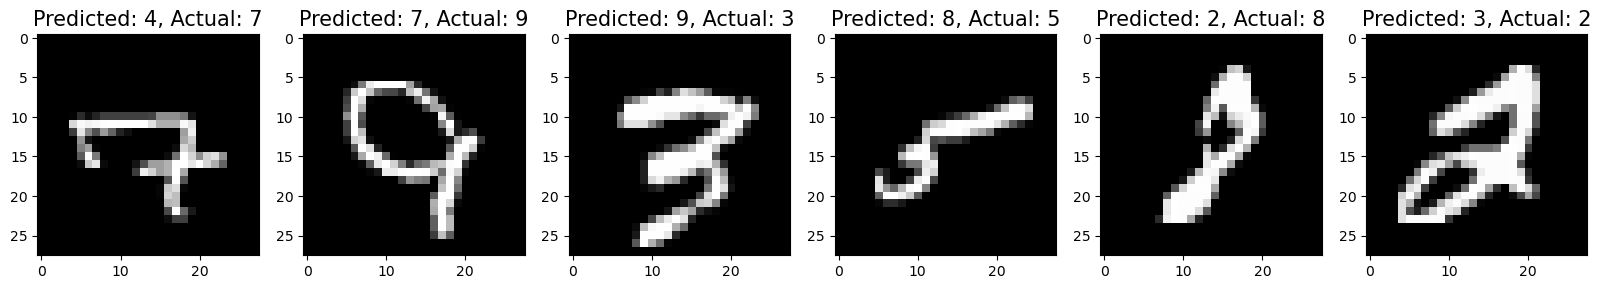

In [9]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:6]):
 plt.subplot(1, 6, plotIndex + 1)
 plt.imshow(np.reshape(test_img.iloc[badIndex].values, (28,28)), cmap=plt.cm.gray)
 plt.title("Predicted: {}, Actual: {}".format(predictions[badIndex], test_lbl.iloc[badIndex]), fontsize = 15)